**Actividad 1**  
Un determinado medio de comunicación desea llevar a cabo un estudio para saber
cuál es el interés que despierta entre sus lectores las noticias relacionadas
directamente con conflictos bélicos. Para ello contabilizará el número de visitas en su canal de comunicación online. El número de visitas sigue una distribución Poisson(𝜃). El estudio se realizó durante 10 meses y el número medio de visitas mensuales fueron las siguientes: 320, 360, 950, 400, 370, 75, 725, 120, 380, 375.  
Se desea contrastar:  
𝐻0: 𝜃=340  
𝐻1: 𝜃 = 450  
Previa no informativa 𝑝(𝐻0) = 𝑝(𝐻1) = 0′5.

In [ ]:
!pip install rpy2
%load_ext rpy2.ipython


In [9]:
%%R
# Datos observados
visitas <- c(320, 360, 950, 400, 370, 75, 725, 120, 380, 375)
n <- length(visitas)
sum_y <- sum(visitas)
mean_y <- mean(visitas)

# Parámetros bajo cada hipótesis
theta0 <- 340
theta1 <- 450

# Para Poisson, el log de la verosimilitud es:
# log(L(theta)) = -n*theta + sum(y)*log(theta) - sum(log(y!))
# Donde el último término es constante en ambas hipótesis y podemos omitirlo

log_lik_H0 <- -n*theta0 + sum_y*log(theta0)
log_lik_H1 <- -n*theta1 + sum_y*log(theta1)

# Factor de Bayes en escala logarítmica
log_B10 <- log_lik_H1 - log_lik_H0

# Convertir a escala normal (con cuidado para evitar desbordamiento)
if(abs(log_B10) > 700) {  # Límite para evitar problemas numéricos
  B10 <- ifelse(log_B10 > 0, Inf, 0)
} else {
  B10 <- exp(log_B10)
}

# Probabilidades a posteriori
p_H0_prior <- 0.5
p_H1_prior <- 0.5

# Cálculo seguro de probabilidades posteriores
if(is.infinite(B10)) {
  p_H0_post <- 0
  p_H1_post <- 1
} else if(B10 == 0) {
  p_H0_post <- 1
  p_H1_post <- 0
} else {
  p_H0_post <- 1/(1 + B10 * (p_H1_prior/p_H0_prior))
  p_H1_post <- 1 - p_H0_post
}

# Resultados
cat("Media muestral:", mean_y, "\n")
cat("Log Factor de Bayes (log B10):", log_B10, "\n")
cat("Factor de Bayes (B10):", B10, "\n")
cat("Probabilidad a posteriori de H0:", p_H0_post, "\n")
cat("Probabilidad a posteriori de H1:", p_H1_post, "\n")

Media muestral: 407.5 
Log Factor de Bayes (log B10): 42.23051 
Factor de Bayes (B10): 2.190164e+18 
Probabilidad a posteriori de H0: 4.565869e-19 
Probabilidad a posteriori de H1: 1 


**Actividad 2**  
Un grupo de expertos sobre el Cambio Climático investigan sobre el calentamiento
global. Disponen de i = 1, … . , 20 observaciones que se distribuyen 𝑦𝑖|𝜃~N(20, σ2).
Los expertos están interesados en realizar el siguiente test de hipótesis y no
disponen de información previa respecto a las hipótesis:

𝐻0: σ2 =1  
𝐻1 σ2 = 3

Calcula el 𝐵10.  
BASE DE DATOS:

20.20, 18.48, 18.93, 19.40, 18.12, 19.18, 19.99, 18.79, 21.56, 21.63,  
22.03, 19.38, 20.98, 19.44, 19.84, 19.87, 22.29, 21.43, 20.16, 22.16


In [8]:
import numpy as np


# Observaciones
datos = np.array([
    20.20, 18.48, 18.93, 19.40, 18.12, 19.18, 19.99, 18.79,
    21.56, 21.63, 22.03, 19.38, 20.98, 19.44, 19.84, 19.87,
    22.29, 21.43, 20.16, 22.16
])

# Cada observación sigue una distribución normal: y_i ~ N(20, σ²)

# Por eso, calculamos la suma de los cuadrados de las diferencias entre cada dato
#y el valor 20.
# SSE = sum((y_i - 20)²)
SSE = np.sum((datos - 20) ** 2)
print("SSE = {:.4f}".format(SSE))

#Calculamos el factor de bayes B10
B10 = 3 ** (-10) * np.exp(SSE / 3)
print("Bayes Factor B10 = {:.4f}".format(B10))


if B10 < 1:
    print("El factor bayes B10 es menor que 1,lo cual indica que, al comparar \nlas verosimilitudes de los datos bajo ambas hipótesis,\nla evidencia respalda más la hipótesis H0, es decir, que la varianza σ² es igual a 1.")

else:
    print("El factor bayes B10 es mayor que 1, lo que sugiere que los datos son \nmás compatibles con la hipótesis H1, es decir, que la \nvarianza σ² es igual a 3.")


SSE = 32.4188
Bayes Factor B10 = 0.8354
El factor bayes B10 es menor que 1,lo cual indica que, al comparar 
las verosimilitudes de los datos bajo ambas hipótesis,
la evidencia respalda más la hipótesis H0, es decir, que la varianza σ² es igual a 1.


**Actividad 3**  
Calcular la Distribución Predictiva Posterior del modelo Bernoulli-Bet(Binomial-Beta) para una observación futura y∗ = 0.  
NOTA: en clase hemos calculado la distribución predictiva posterior para y∗ = 1.

Si queremos cuantificar nuestro estado de información acerca de una observación futura dado que ya tengo observaciones acerca de la realidad que estamos estudiando, deberíamos obtener la distribución predictiva ya que tiene por objetivo describir el comportamiento estocástico de una observación que no tuve la oportunidad de observar, dado que ya observé una base de datos.

¿Cómo se escribe?
y = y1, y2, ..., yn base de datos observados
y* observación futura  

yi siguen una Bernoulli con parámetro p.
Prior de 𝑝:p ∼Beta(α,β)

**Distribución posterior del parámetro 𝑝**  

$$
p(p \mid y) \sim \text{Beta} \left( \alpha + \sum_{i=1}^{n} y_i,\ \beta + n - \sum_{i=1}^{n} y_i \right)
$$

El objetivo es encontrar:  
p(y* = 0 ∣ y).

La distribución predictiva se obtiene con la verosimilitud de la nueva observación respecto a la distribución posterior del parámetro:  

$$
p(y^* \mid y) = \int p(y^* \mid p)\, p(p \mid y)\, dp.
$$

  $$
p(y^* = 0 \mid p) = 1 - p.
$$
  
**La integral: **  

$$
I = \int_0^1 (1 - p)\, \text{Beta}\left(p;\, \alpha + \sum y_i,\, \beta + n - \sum y_i\right) dp,
$$
**La integral corresponde a la esperanza de 1 - p bajo la distribución posterior.**
$$
I = \mathbb{E}_{p \mid y}[1 - p] = 1 - \mathbb{E}_{p \mid y}[p].
$$
  **Beta(a,b)**
  $$
\mathbb{E}[p] = \frac{a}{a + b}.
$$

$$
a = \alpha + \sum_{i=1}^{n} y_i \quad \text{y} \quad b = \beta + n - \sum_{i=1}^{n} y_i,
$$
$$
\mathbb{E}[p \mid y] = \frac{\alpha + \sum y_i}{\alpha + \beta + n}.
$$

$$
p(y^* = 0 \mid y) = 1 - \frac{\alpha + \sum y_i}{\alpha + \beta + n} = \frac{(\alpha + \beta + n) - (\alpha + \sum y_i)}{\alpha + \beta + n}.
$$
 $$
(\alpha + \beta + n) - \left( \alpha + \sum y_i \right) = \beta + n - \sum y_i.
$$
$$
p(y^* = 0 \mid y) = \frac{\beta + n - \sum y_i}{\alpha + \beta + n}.
$$


**Actividad 4**  
Calcula la Distribución Predictiva Posterior del Model Gamma-Poisson. Es importante justificar cada cálculo.

Datos: 4 7 4 8 9 2 5 8 5 5 9 5 6 5 2 8 3 2 4 9 
Media muestral: 5.5 
Suma total: 110 
Número de observaciones: 20 

Parámetros previos: alpha = 2 , beta = 1 
Parámetros posteriores: alpha = 112 , beta = 21 

Media de la distribución predictiva posterior: 5.333333 
Varianza de la distribución predictiva posterior: 5.587302 

   y_star probabilidad
1       0  0.005460353
2       1  0.027798163
3       2  0.071390737
4       3  0.123311273
5       4  0.161145414
6       5  0.169935164
7       6  0.150624350
8       7  0.115413463
9       8  0.078035239
10      9  0.047294084
11     10  0.026011746
12     11  0.013113360
13     12  0.006109634
14     13  0.002648932
15     14  0.001075054
16     15  0.000410475


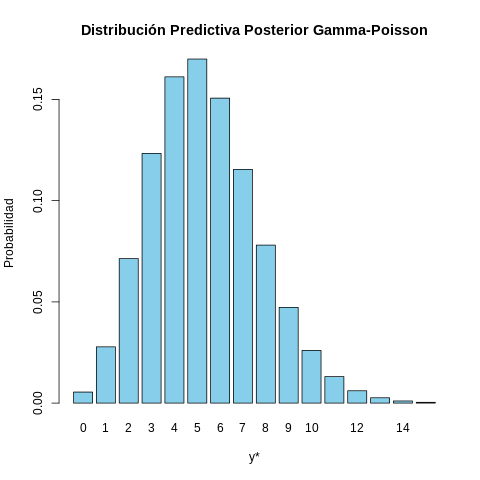

In [10]:
%%R
# Modelo Gamma-Poisson para la distribución predictiva posterior
gamma_poisson_pred_posterior <- function(y_star, alpha_prior, beta_prior, datos) {
  # Parámetros posteriores para la distribución Gamma
  n <- length(datos)
  sum_y <- sum(datos)

  alpha_post <- alpha_prior + sum_y
  beta_post <- beta_prior + n

  # Cálculo de la predictiva posterior para y*
  # Para el modelo Gamma-Poisson, la predictiva posterior sigue una distribución
  # Binomial Negativa con parámetros r = alpha_post y p = beta_post/(beta_post + 1)
  r <- alpha_post
  p <- beta_post/(beta_post + 1)

  # Calculamos P(Y* = y_star)
  prob <- dnbinom(y_star, size = r, prob = p)

  # Información adicional para la interpretación
  mean_pred <- r * (1-p)/p  # Media de la distribución predictiva posterior
  var_pred <- r * (1-p)/(p^2)  # Varianza de la distribución predictiva posterior

  return(list(
    prob = prob,
    mean = mean_pred,
    variance = var_pred,
    alpha_post = alpha_post,
    beta_post = beta_post
  ))
}

# Ejemplo con datos simulados
set.seed(123)
datos_ejemplo <- rpois(20, lambda = 5)  # 20 observaciones Poisson con lambda = 5

# Parámetros previos
alpha_prior <- 2
beta_prior <- 1

# Calculamos la predictiva posterior para diferentes valores de y*
y_stars <- 0:15
resultados <- sapply(y_stars, function(y) {
  gamma_poisson_pred_posterior(y, alpha_prior, beta_prior, datos_ejemplo)$prob
})

# Mostramos los resultados
resultados_df <- data.frame(
  y_star = y_stars,
  probabilidad = resultados
)

# Información general sobre el modelo
info <- gamma_poisson_pred_posterior(0, alpha_prior, beta_prior, datos_ejemplo)

cat("Datos:", datos_ejemplo, "\n")
cat("Media muestral:", mean(datos_ejemplo), "\n")
cat("Suma total:", sum(datos_ejemplo), "\n")
cat("Número de observaciones:", length(datos_ejemplo), "\n\n")

cat("Parámetros previos: alpha =", alpha_prior, ", beta =", beta_prior, "\n")
cat("Parámetros posteriores: alpha =", info$alpha_post, ", beta =", info$beta_post, "\n\n")

cat("Media de la distribución predictiva posterior:", info$mean, "\n")
cat("Varianza de la distribución predictiva posterior:", info$variance, "\n\n")

print(resultados_df)

# Visualización de la distribución predictiva posterior
barplot(resultados_df$probabilidad, names.arg = resultados_df$y_star,
        xlab = "y*", ylab = "Probabilidad",
        main = "Distribución Predictiva Posterior Gamma-Poisson",
        col = "skyblue")

### Justificación de los cálculos:

1. **Actualización de parámetros**:
   - Para una distribución Gamma previa con parámetros (α, β) y datos Poisson, la distribución posterior es Gamma con parámetros:
     - α_post = α_prior + Σy (suma de todas las observaciones)
     - β_post = β_prior + n (número de observaciones)
   - Esta actualización representa la combinación de la información previa con la información de los datos.

2. **Distribución predictiva posterior**:
   - Cuando integramos la verosimilitud Poisson(y*|θ) con la posterior Gamma(θ|α_post, β_post), obtenemos una distribución Binomial Negativa.
   - La fórmula es: P(y*|datos) = ∫ P(y*|θ) × P(θ|datos) dθ
   - Esto resulta en una Binomial Negativa con parámetros:
     - r = α_post
     - p = β_post/(β_post + 1)

3. **Propiedades de la predictiva posterior**:
   - Media: α_post / β_post (la misma que la media de la posterior de θ)
   - Varianza: α_post(β_post + 1) / β_post² (mayor que la varianza de la posterior, reflejando la incertidumbre adicional de predecir un nuevo valor)

Esta implementación proporciona no solo las probabilidades para diferentes valores de y*, sino también información sobre la distribución predictiva posterior completa, lo que ayuda a entender mejor el comportamiento esperado de futuras observaciones.

**Actividad 5**  
Pregunta teórica:  
Explica brevemente las principales diferencias entre las pruebas de hipótesis bajo un enfoque frecuentista y uno bayesiano.

# Diferencias entre pruebas de hipótesis frecuentistas y bayesianas

Las pruebas de hipótesis frecuentistas y bayesianas representan dos enfoques fundamentalmente distintos para evaluar evidencia estadística:

## Enfoque frecuentista

1. **Interpretación de probabilidad**: Se basa en la frecuencia relativa a largo plazo de eventos en experimentos repetidos.

2. **Hipótesis fijas, datos aleatorios**: Considera los parámetros como valores fijos desconocidos, y los datos como aleatorios.

3. **Valor p**: Calcula la probabilidad de obtener datos tan o más extremos que los observados, asumiendo que la hipótesis nula es cierta: P(datos|H₀).

4. **Decisión binaria**: Típicamente resulta en rechazar o no rechazar la hipótesis nula basándose en un umbral predefinido (p < 0.05).

5. **Información previa**: No incorpora formalmente conocimiento previo o creencias sobre los parámetros.

## Enfoque bayesiano

1. **Interpretación de probabilidad**: Representa el grado de creencia o estado de conocimiento sobre una hipótesis.

2. **Datos fijos, hipótesis aleatorias**: Una vez observados los datos, calcula probabilidades sobre las hipótesis.

3. **Probabilidad posterior**: Calcula directamente la probabilidad de la hipótesis dados los datos: P(H|datos).

4. **Medición de evidencia**: Utiliza factores de Bayes o probabilidades posteriores para cuantificar la evidencia relativa entre hipótesis.

5. **Información previa**: Incorpora explícitamente el conocimiento o creencias previas a través de distribuciones a priori.

## Diferencias clave

- El enfoque frecuentista responde "¿Cuán probable son estos datos si la hipótesis nula es cierta?", mientras que el bayesiano responde "¿Cuán probable es esta hipótesis dados los datos observados?"

- El bayesiano permite actualizar continuamente el conocimiento a medida que llegan nuevos datos, mientras que el frecuentista trata cada prueba como un evento independiente.

- El enfoque bayesiano cuantifica directamente la incertidumbre sobre los parámetros y evalúa hipótesis de manera probabilística, en lugar de ofrecer decisiones binarias.

- Los métodos bayesianos integran información previa, lo que puede ser una ventaja cuando hay conocimiento experto disponible, pero también introduce subjetividad en la elección de las distribuciones previas.